In [276]:
import pandas as pd

In [277]:
df=pd.read_excel('Borrow Amount.xlsx')

In [278]:
df.dtypes

States            object
Code              object
Latitude         float64
Longitude        float64
Borrow_Amount      int64
Buckets           object
dtype: object

In [279]:
df.head()

,States,Code,Latitude,Longitude,Borrow_Amount,Buckets
0,Alabama,AK,32.806671,-86.791130,282817,Less than Zero
1,Alaska,AL,61.370716,-152.404419,3614454,0-10
2,Arizona,AR,33.729759,-111.431221,1181690,0-10
3,Arkansas,AZ,34.969704,-92.373123,4494733,0-10
4,California,CA,36.116203,-119.681564,43350770,40-50


### Getting top  10 borrowers

In [280]:
top_borrowers=df.sort_values('Borrow_Amount',ascending=False)

#### Ordering  index, if i use (drop=True) then i dont have to use top_borrowers=top_borrowers.drop('index',axis=1)

In [281]:
top_borrowers=top_borrowers.reset_index(drop=True)
#top_borrowers=top_borrowers.drop('index',axis=1)
#top_borrowers=top_borrowers.drop('level_0',axis=1)

In [282]:
top_borrowers[:10]

,States,Code,Latitude,Longitude,Borrow_Amount,Buckets
0,New York,NY,42.165726,-74.948051,52737484,More than 50
1,California,CA,36.116203,-119.681564,43350770,40-50
2,Texas,TX,31.054487,-97.563461,37001819,30-40
3,Illinois,IL,40.349457,-88.986137,27487023,20-30
4,New Jersey,NJ,40.298904,-74.521011,20624686,10-20
5,Pennsylvania,PA,40.590752,-77.209755,18846307,10-20
6,Florida,FL,27.766279,-81.686783,17095802,10-20
7,Maine,MA,44.693947,-69.381927,16949915,10-20
8,Virginia,VA,37.769337,-78.169968,16814004,10-20
9,Ohio,OH,40.388783,-82.764915,12728416,10-20


### change Borrow Amount(int64) to Object(str)

In [283]:
df['Borrow_Amount'] = df['Borrow_Amount'].map('${:,.2f}'.format)

In [284]:
df.head()

,States,Code,Latitude,Longitude,Borrow_Amount,Buckets
0,Alabama,AK,32.806671,-86.791130,"$282,817.00",Less than Zero
1,Alaska,AL,61.370716,-152.404419,"$3,614,454.00",0-10
2,Arizona,AR,33.729759,-111.431221,"$1,181,690.00",0-10
3,Arkansas,AZ,34.969704,-92.373123,"$4,494,733.00",0-10
4,California,CA,36.116203,-119.681564,"$43,350,770.00",40-50


In [285]:
top_borrowers['Borrow_Amount'] = top_borrowers['Borrow_Amount'].map('${:,.2f}'.format)

In [286]:
top_borrowers[:10]

,States,Code,Latitude,Longitude,Borrow_Amount,Buckets
0,New York,NY,42.165726,-74.948051,"$52,737,484.00",More than 50
1,California,CA,36.116203,-119.681564,"$43,350,770.00",40-50
2,Texas,TX,31.054487,-97.563461,"$37,001,819.00",30-40
3,Illinois,IL,40.349457,-88.986137,"$27,487,023.00",20-30
4,New Jersey,NJ,40.298904,-74.521011,"$20,624,686.00",10-20
5,Pennsylvania,PA,40.590752,-77.209755,"$18,846,307.00",10-20
6,Florida,FL,27.766279,-81.686783,"$17,095,802.00",10-20
7,Maine,MA,44.693947,-69.381927,"$16,949,915.00",10-20
8,Virginia,VA,37.769337,-78.169968,"$16,814,004.00",10-20
9,Ohio,OH,40.388783,-82.764915,"$12,728,416.00",10-20


In [287]:
buckets=top_borrowers.groupby('Buckets').count()
buckets

,States,Code,Latitude,Longitude,Borrow_Amount
Buckets,,,,,
0-10,26,26,26,26,26
10-20,8,8,8,8,8
20-30,1,1,1,1,1
30-40,1,1,1,1,1
40-50,1,1,1,1,1
Less than Zero,5,5,5,5,5
More than 50,1,1,1,1,1


In [288]:
buckets=buckets.reset_index()
buckets[:1]

,Buckets,States,Code,Latitude,Longitude,Borrow_Amount
0,0-10,26,26,26,26,26


In [289]:
buckets=buckets[['Buckets','States']]
buckets

,Buckets,States
0,0-10,26
1,10-20,8
2,20-30,1
3,30-40,1
4,40-50,1
5,Less than Zero,5
6,More than 50,1


In [290]:
buckets.columns

Index(['Buckets', 'States'], dtype='object')

#### rename the column

In [291]:
buckets.columns.values[1]='State_count'

In [292]:
#buckets.reindex(["1", "2", "3","4","5","0","6"])
buckets

,Buckets,State_count
0,0-10,26
1,10-20,8
2,20-30,1
3,30-40,1
4,40-50,1
5,Less than Zero,5
6,More than 50,1


### Moving desired row to the top of pandas Data Frame, here i want 5th(Less than Zero) row on top

#### adding a fake index column

In [293]:
buckets["fake_index"] = range(1,len(buckets)+1)
buckets

,Buckets,State_count,fake_index
0,0-10,26,1
1,10-20,8,2
2,20-30,1,3
3,30-40,1,4
4,40-50,1,5
5,Less than Zero,5,6
6,More than 50,1,7


In [294]:
buckets.ix[5,'fake_index'] = 0
buckets

,Buckets,State_count,fake_index
0,0-10,26,1
1,10-20,8,2
2,20-30,1,3
3,30-40,1,4
4,40-50,1,5
5,Less than Zero,5,0
6,More than 50,1,7


#### Sorting by "fake_index" at the same time droping the column "fake_index" + reseting the index

In [295]:
buckets=buckets.sort_values("fake_index").drop('fake_index', axis=1).reset_index(drop='True')

In [296]:
buckets

,Buckets,State_count
0,Less than Zero,5
1,0-10,26
2,10-20,8
3,20-30,1
4,30-40,1
5,40-50,1
6,More than 50,1


In [297]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x080EFB90>], dtype=object)

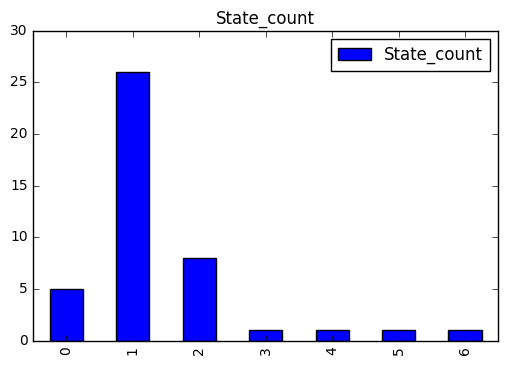

In [298]:
buckets.plot(kind='bar',subplots=True)

# Calling Plotly API

In [299]:
import plotly.plotly as py
import plotly.graph_objs as go
#Setting plotly credentials
#mantejsingh account
py.sign_in('mantejsingh','hQnYIqbxnsuRvQxkVFVW')
#NJIT account
##py.sign_in('mhd9','a7aJsSJEwfTNiZqqCBwS')

In [300]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [301]:
df['text'] = df['States'] + '<br>' +\
    'Total Outstanding Amount '+df['Borrow_Amount']

## United States Choropleth Map

In [302]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['Code'],
        z = df['Borrow_Amount'].replace('[\$,]','',regex=True).astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '<b>2016 US Borrowed Loan Amount by State</b> <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='TotalOutstandingAmount-cloropleth-map', fileopt='overwrite' )

## United States Bubble Map

In [303]:
top_borrowers['text'] = top_borrowers['States'] + '<br>' +\
    'Total Outstanding Amount= '+top_borrowers['Borrow_Amount'] +'<br>'+\
    'Bucket= '+top_borrowers['Buckets']

In [304]:
types = buckets['Buckets'].tolist()
len(types)

7

### finding the latitudes and longitudes by type¶


In [306]:
for i in range(len(types)):
    df_sub = top_borrowers.loc[top_borrowers.Buckets==types[i],:]
    print(len(df_sub))
    #print(types[i])

5
26
8
1
1
1
1


In [307]:
colors = ["rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","#006064","rgb(0,116,217)","#d50000","#263238"]
cases = []
for i in range(len(types)):
    df_sub = top_borrowers.loc[top_borrowers.Buckets==types[i],:]
    cases.append(go.Scattergeo(
            locationmode = 'USA-states',
            lon = df_sub['Longitude'],
            lat = df_sub['Latitude'],
            text = df_sub['text'],
            name = types[i] + ' Millions : '+str(len((df_sub))),
            marker = dict(
            size = df_sub['Borrow_Amount'].replace('[\$,]','',regex=True).astype(float)/20000,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
                )
            ))    
layout=dict(
        title = '<b>2016 US Borrowed Loan Amount by State in Millons $</b><br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
                ),
            )
fig = dict( data=cases, layout=layout )
py.iplot( fig, validate=False, filename='TotalOutstandingAmount-bubble-map-populations', fileopt='overwrite' )
#url= py.plot(fig, validate=False, filename='TotalOutstandingAmount-bubble-map-populations', fileopt='overwrite' )

#### Open the plot in new tab

In [308]:
url= py.plot(fig, validate=False, filename='TotalOutstandingAmount-bubble-map-populations', fileopt='overwrite' )

# Thnak you for visiting